In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

# Explore data

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.shape

(10000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [12]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9353,670,Spain,Male,37,0,178742.71,1,1,1,194493.57,0
9869,521,France,Male,38,6,0.00,2,1,0,51454.06,0
7948,705,France,Male,25,3,113736.27,1,0,1,196864.61,0
9116,562,France,Male,62,3,0.00,2,1,0,105986.01,0
2010,556,Spain,Female,48,8,168522.37,1,1,1,151310.16,0


# Encoding Categorical Data

In [14]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
data = pd.get_dummies(data, drop_first=True)

In [16]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


# Not Handling Imbalanced Data 

In [18]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

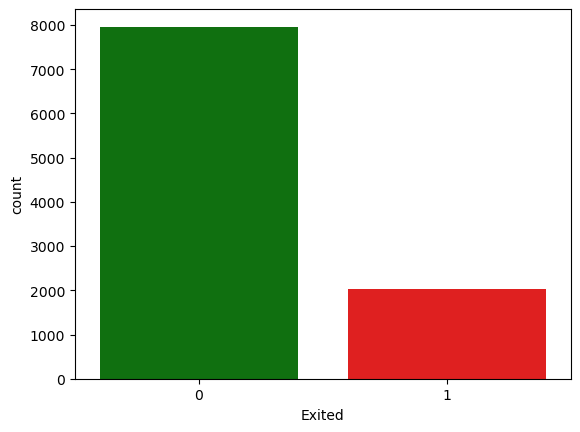

In [19]:
import seaborn as sns

sns.countplot(data, x='Exited', hue='Exited', legend=False, palette=['green','red'])

In [20]:
X = data.drop('Exited', axis=1)
y = data['Exited']

## Splitting The Dataset Into The Training Set And Test Set

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=42, stratify=y)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred1 = log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
accuracy_score(y_test, y_pred1)

0.808

In [29]:
precision_score(y_test, y_pred1)

0.5891472868217055

In [30]:
recall_score(y_test, y_pred1)

0.18673218673218672

In [31]:
f1_score(y_test, y_pred1)

0.2835820895522388

# Handling Imbalanced Data With SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

## Split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X_res,y_res, test_size=0.20, random_state=42)

## Scaling

In [37]:
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# 1. Logistic Regression 

In [39]:
log.fit(X_train, y_train)

y_pred1 = log.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred1)

0.7652228499686127

In [41]:
precision_score(y_test, y_pred1)

0.76324395029431

In [42]:
recall_score(y_test, y_pred1)

0.7514488087572441

In [43]:
f1_score(y_test, y_pred1)

0.7573004542504866

# 2. Support Vector Classifier 

In [45]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred2 = svm.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred2)

0.8402385436283741

In [47]:
precision_score(y_test, y_pred2)

0.848

In [48]:
recall_score(y_test, y_pred2)

0.8190598840952994

In [49]:
f1_score(y_test, y_pred2)

0.8332787422207665

# 3. KNeighbors Classifier  (KNN) 

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred3 = knn.predict(X_test)

In [52]:
accuracy_score(y_test, y_pred3)

0.8217200251098556

In [53]:
precision_score(y_test, y_pred3)

0.8068535825545171

In [54]:
recall_score(y_test, y_pred3)

0.8338699291693497

In [55]:
f1_score(y_test, y_pred3)

0.8201393286890437

# 4. Decision Tree Classifier 

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred4 = dt.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred4)

0.7984934086629002

In [59]:
precision_score(y_test, y_pred4)

0.7785932721712538

In [60]:
recall_score(y_test, y_pred4)

0.819703799098519

In [61]:
f1_score(y_test, y_pred4)

0.7986198243412798

# 5. Random Forest Classifier 

In [63]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred5 = rf.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred5)

0.8706842435655995

In [65]:
precision_score(y_test, y_pred5)

0.8673535093367676

In [66]:
recall_score(y_test, y_pred5)

0.8673535093367676

In [67]:
f1_score(y_test, y_pred5)

0.8673535093367676

# 6. Gradient Boosting Classifier 

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred6 = gb.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred5)

0.8706842435655995

In [71]:
precision_score(y_test, y_pred5)

0.8673535093367676

In [72]:
recall_score(y_test, y_pred5)

0.8673535093367676

In [73]:
f1_score(y_test, y_pred5)

0.8673535093367676

#  ----- Best Model -----  

In [75]:
final_data= pd.DataFrame({'Models' : ['LR', 'SVC', 'KNN', ' DT', 'RF', 'GB' ],
                          'Accuracy' : [accuracy_score(y_test, y_pred1)*100, 
                                   accuracy_score(y_test, y_pred2)*100, 
                                   accuracy_score(y_test, y_pred3)*100, 
                                   accuracy_score(y_test, y_pred4)*100, 
                                   accuracy_score(y_test, y_pred5)*100, 
                                   accuracy_score(y_test, y_pred6)*100],
                          'Precision' : [precision_score(y_test, y_pred1)*100, 
                                   precision_score(y_test, y_pred2)*100, 
                                   precision_score(y_test, y_pred3)*100, 
                                   precision_score(y_test, y_pred4)*100, 
                                   precision_score(y_test, y_pred5)*100, 
                                   precision_score(y_test, y_pred6)*100 ]
                         })

In [76]:
final_data = final_data.sort_values(by=['Accuracy'], ascending=False)
final_data

,Models,Accuracy,Precision
4,RF,87.068424,86.735351
1,SVC,84.023854,84.800000
5,GB,83.050847,83.388266
2,KNN,82.172003,80.685358
3,DT,79.849341,77.859327
0,LR,76.522285,76.324395


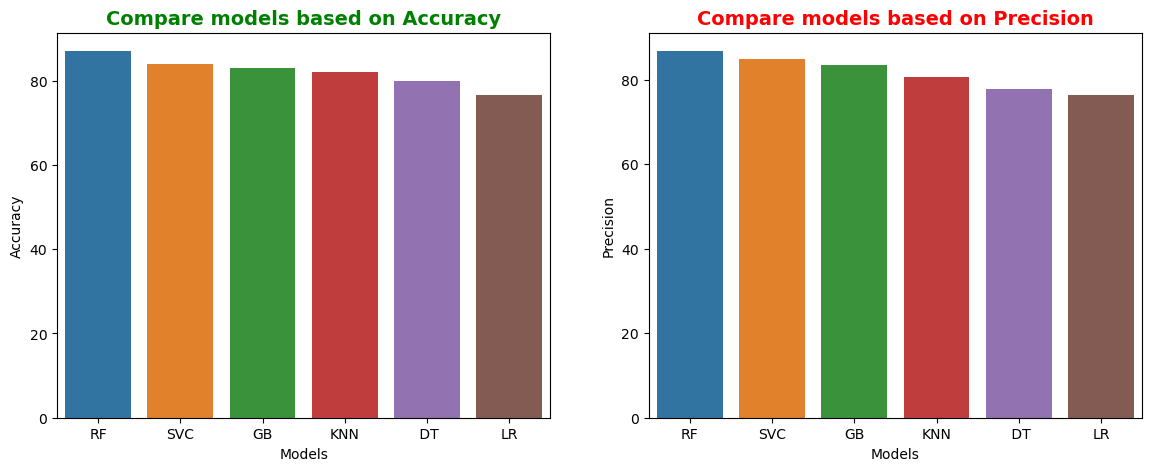

In [77]:
from matplotlib import pyplot as plt

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: According to Accuracy
plt.subplot(1, 2, 1)

sns.barplot(x='Models', y='Accuracy', data=final_data, hue=final_data['Models'])

# Set labels and title for the first subplot.
plt.xlabel("Models", fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Compare models based on Accuracy', fontsize=14, weight='bold', color='green')


# Subplot 2: According to Precision
plt.subplot(1, 2, 2)

sns.barplot(x='Models', y='Precision', data=final_data, hue=final_data['Models'])

# Set labels and title for the second subplot.
plt.xlabel("Models", fontsize=10)
plt.ylabel('Precision', fontsize=10)
plt.title('Compare models based on Precision', fontsize=14, weight='bold', color='red')


# Display the subplots side by side.
plt.show()

# Save The Model

In [79]:
X_res= sc.fit_transform(X_res)
rf.fit(X_res, y_res)

RandomForestClassifier()

In [80]:
import joblib

joblib.dump(rf,'coustomer-churn-prediction_model')
model = joblib.load('coustomer-churn-prediction_model')

In [81]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [82]:
model.predict([[600, 44, 2, 0.0, 0, 0, 0, 111111.11, 0, 0, 0]])

# 0 means Coustomer will not exit
# 1 means Coustomer will exit

array([1])

# GUI

In [ ]:
from tkinter import *

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('coustomer-churn-prediction_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="Coustomer NOT Exit").grid(row=31)
    else:
        Label(master, text="Coustomer Exit").grid(row=31)
    
    
master = Tk()
master.title("Customers Churn Prediction")


label = Label(master, text = "Customers Churn Prediction"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)      # 1 for Germany/ 2 for Spain/ 3 for France 
Label(master,text="Gender").grid(row=10)         # 0 for Female/ 1 for Male


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
